# STUDY ON GUJARAT ELECTION
                                                                                                                
by Abhilash Ajay

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import torch.nn as nn
import torch.functional as F
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import cufflinks as cf
cf.go_offline()
%matplotlib inline

# Data prep

In [2]:
df = pd.read_csv('GujAE.csv')

In [3]:
df.columns

Index(['Election_Type', 'State_Name', 'Assembly_No', 'Constituency_No', 'Year',
       'month', 'Poll_No', 'DelimID', 'Position', 'Candidate', 'Sex', 'Party',
       'Votes', 'Candidate_Type', 'Valid_Votes', 'Electors',
       'Constituency_Name', 'Constituency_Type', 'Sub_Region', 'N_Cand',
       'Turnout_Percentage', 'Vote_Share_Percentage', 'Deposit_Lost', 'Margin',
       'Margin_Percentage', 'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID',
       'last_poll', 'Contested', 'Last_Party', 'Last_Party_ID',
       'Last_Constituency_Name', 'Same_Constituency', 'Same_Party', 'No_Terms',
       'Turncoat', 'Incumbent', 'Recontest', 'Age', 'District_Name', 'PC_Name',
       'PC_No', 'CandID', 'MyNeta_education', 'TCPD_Prof_Main',
       'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc'],
      dtype='object')

In [4]:
df_2007 = df[df['Year']== 2007].copy()

In [5]:
df_2007['Electors']

0       137105
1       137105
2       137105
3       137105
4       137105
         ...  
1372    280982
1373    280982
1374    280982
1375    280982
1376    280982
Name: Electors, Length: 1268, dtype: int64

In [6]:
df['Year'].unique()

array([2007, 2009, 2010, 2011, 2012, 2014, 2013, 2016, 2017], dtype=int64)

In [7]:
df['Constituency_No'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [8]:
df_2007['Constituency_No'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [9]:
df_2007['Constituency_Name'].nunique()

178

In [10]:
len(df['Constituency_Name'].unique())

233

In [11]:
df_2012 = df[df['Year'] == 2012].copy()

In [12]:
df_2012['Constituency_Name'].nunique()

176

In [13]:
df_2017 = df[df['Year'] == 2017].copy()

In [14]:
df_2017['Constituency_Name'].unique()

array(['ABDASA', 'MANDVI', 'BHUJ', 'ANJAR', 'GANDHIDHAM', 'RAPAR', 'VAV',
       'THARAD', 'DHANERA', 'DANTA', 'VADGAM', 'PALANPUR', 'DEESA',
       'DEODAR', 'KANKREJ', 'RADHANPUR', 'CHANASMA', 'PATAN', 'SIDHPUR',
       'KHERALU', 'UNJHA', 'VISNAGAR', 'BECHARAJI', 'KADI', 'MEHSANA',
       'VIJAPUR', 'HIMATNAGAR', 'IDAR', 'KHEDBRAHMA', 'BHILODA', 'MODASA',
       'BAYAD', 'PRANTIJ', 'DEHGAM', 'GANDHINAGAR SOUTH',
       'GANDHINAGAR NORTH', 'MANSA', 'KALOL', 'VIRAMGAM', 'SANAND',
       'GHATLODIA', 'VEJALPUR', 'VATVA', 'ELLIS BRIDGE', 'NARANPURA',
       'NIKOL', 'NARODA', 'THAKKARBAPA NAGAR', 'BAPUNAGAR', 'AMRAIWADI',
       'DARIAPUR', 'JAMALPUR-KHADIA', 'MANINAGAR', 'DANILIMDA',
       'SABARMATI', 'ASARWA', 'DASKROI', 'DHOLKA', 'DHANDHUKA', 'DASADA',
       'LIMBDI', 'WADHWAN', 'CHOTILA', 'DHRANGADHRA', 'MORVI', 'TANKARA',
       'WANKANER', 'RAJKOT EAST', 'RAJKOT WEST', 'RAJKOT SOUTH',
       'RAJKOT RURAL', 'JASDAN', 'GONDAL', 'JETPUR', 'DHORAJI', 'KALAWAD',
       'JAMNAGAR R

In [15]:
df_2017['Constituency_No'].nunique()

182

In [16]:
df_2017[df_2017['Constituency_Name']=='']

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,...,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc


In [17]:
df_2017.isnull().sum()

Election_Type                0
State_Name                   0
Assembly_No                  0
Constituency_No              0
Year                         0
month                        0
Poll_No                      0
DelimID                      0
Position                     0
Candidate                    0
Sex                        182
Party                        0
Votes                        0
Candidate_Type             182
Valid_Votes                  0
Electors                     0
Constituency_Name            0
Constituency_Type            0
Sub_Region                   0
N_Cand                       0
Turnout_Percentage           0
Vote_Share_Percentage        0
Deposit_Lost                 0
Margin                       0
Margin_Percentage            0
ENOP                         0
pid                        182
Party_Type_TCPD           2010
Party_ID                     0
last_poll                    0
Contested                  182
Last_Party                1634
Last_Par

In [18]:
df_2012['Constituency_Name'].nunique()

176

In [19]:
df_2017['Constituency_Name'].nunique()

176

In [20]:
df_2007['Constituency_Name'].nunique()

178

In [21]:
df_2009 = df[df['Year'] == 2009].copy()
df_2010 = df[df['Year'] == 2010].copy()
df_2011 = df[df['Year'] == 2011].copy()
df_2013 = df[df['Year'] == 2013].copy()
df_2014 = df[df['Year'] == 2014].copy()
df_2016 = df[df['Year'] == 2016].copy()

# DataFrame with Only Winning Candidates

In [272]:
df_2007_winners = df_2007[df_2007['Position'] == 1]

In [273]:
df_2012_winners = df_2012[df_2012['Position'] == 1]

In [274]:
df_2017_winners = df_2017[df_2017['Position'] == 1]

In [275]:
len(df_2007_winners)

182

In [25]:
df_2009_winners = df_2009[df_2009['Position'] == 1]
df_2010_winners = df_2010[df_2010['Position'] == 1]
df_2011_winners = df_2011[df_2011['Position'] == 1]
df_2013_winners = df_2013[df_2013['Position'] == 1]
df_2014_winners = df_2014[df_2014['Position'] == 1]
df_2016_winners = df_2016[df_2016['Position'] == 1]

In [26]:
df_2016_winners

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,...,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc
2404,AE,Gujarat,12,91,2016,12,1,4,1,Govind Bhai Varjang Bhai Parmar,...,NaN,Gir Somnath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3116,AE,Gujarat,12,168,2016,12,1,4,1,Zankhana HiteshKumar Patel (Rajabbhai),...,NaN,Surat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.dtypes

Election_Type              object
State_Name                 object
Assembly_No                 int64
Constituency_No             int64
Year                        int64
month                       int64
Poll_No                     int64
DelimID                     int64
Position                    int64
Candidate                  object
Sex                        object
Party                      object
Votes                       int64
Candidate_Type             object
Valid_Votes                 int64
Electors                    int64
Constituency_Name          object
Constituency_Type          object
Sub_Region                 object
N_Cand                      int64
Turnout_Percentage        float64
Vote_Share_Percentage     float64
Deposit_Lost               object
Margin                      int64
Margin_Percentage         float64
ENOP                      float64
pid                        object
Party_Type_TCPD           float64
Party_ID                    int64
last_poll     

# District and Constituency Level Analysis

In [47]:
st_con_vt = df_2017[['Constituency_Type','Constituency_No','Constituency_Name', 'Electors']]

In [48]:
st_con_vt

,Constituency_Type,Constituency_No,Constituency_Name,Electors
3242,GEN,1,ABDASA,223705
3243,GEN,1,ABDASA,223705
3244,GEN,1,ABDASA,223705
3245,GEN,1,ABDASA,223705
3246,GEN,1,ABDASA,223705
...,...,...,...,...
5247,ST,182,UMBERGAON,244481
5248,ST,182,UMBERGAON,244481
5249,ST,182,UMBERGAON,244481
5250,ST,182,UMBERGAON,244481


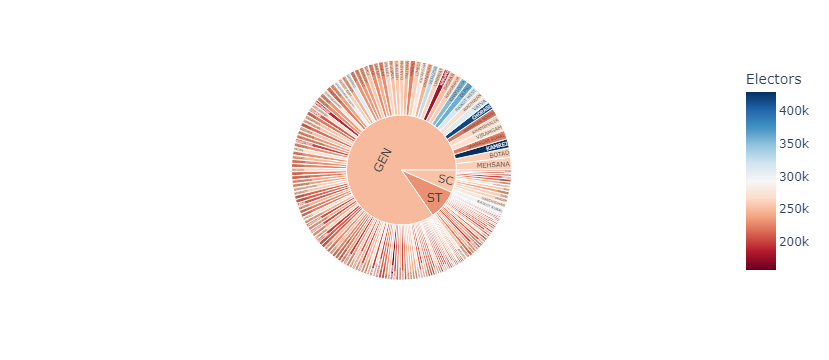

In [76]:
fig = px.sunburst(st_con_vt, path=['Constituency_Type', 'Constituency_Name'],
                  values='Electors', color='Electors',  color_continuous_scale='RdBu',)
fig.update_layout(autosize=True)
fig.show()

In [77]:
fig.write_html("Constituency_Type_No_Electors.html")

# Which Parties Have the most Candidates for 2007, 2012, 2017 Election

In [151]:
party_cnt_2007 = df_2007.groupby('Party').apply(lambda x:x['Constituency_Name'].count())

In [152]:
party_cnt_2012 = df_2012.groupby('Party').apply(lambda x:x['Constituency_Name'].count())
party_cnt_2017 = df_2017.groupby('Party').apply(lambda x:x['Constituency_Name'].count())

In [153]:
type(party_cnt_2007)

pandas.core.series.Series

In [154]:
df_party_cnt_2007 = pd.DataFrame(party_cnt_2007, columns=['2007'])
df_party_cnt_2012 = pd.DataFrame(party_cnt_2012, columns=['2012'])
df_party_cnt_2017 = pd.DataFrame(party_cnt_2012, columns=['2017'])

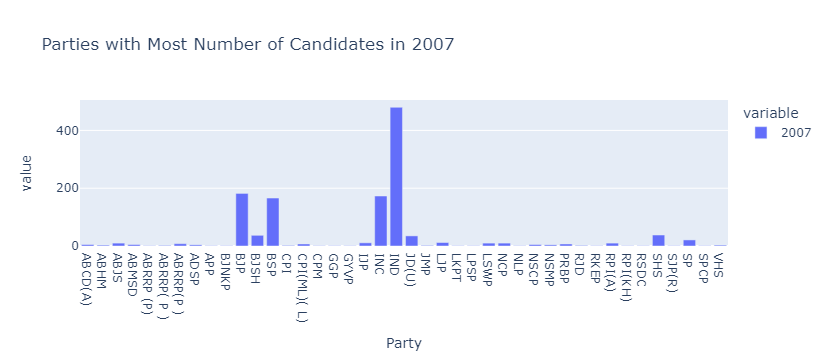

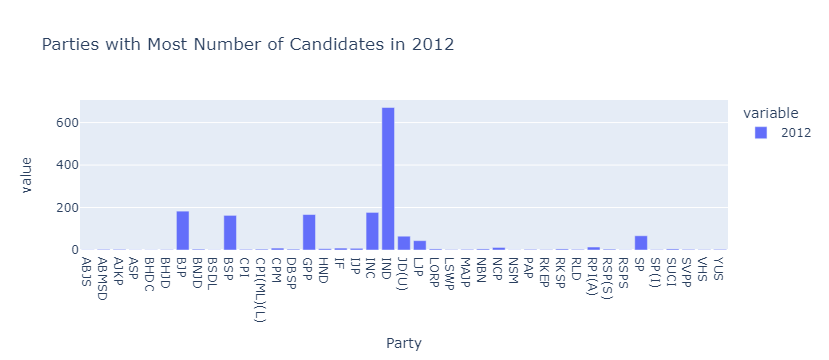

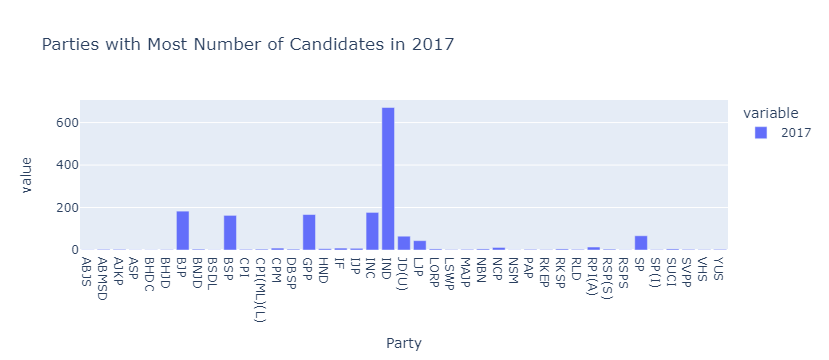

In [163]:
fig = px.bar(df_party_cnt_2007, title="Parties with Most Number of Candidates in 2007")
fig.update_layout()
fig1 = px.bar(df_party_cnt_2012, title="Parties with Most Number of Candidates in 2012")
fig1.update_layout()
fig2 = px.bar(df_party_cnt_2017, title="Parties with Most Number of Candidates in 2017")
fig2.update_layout()
fig.show()
fig1.show()
fig2.show()

In [174]:
df_winners = df.copy()

In [177]:
df_2007_winners

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,...,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc
0,AE,Gujarat,11,1,2007,12,0,3,1,JAYANTILAL PARSOTTAM BHANUSHALI,...,43.0,NaN,NaN,NaN,NaN,5th Pass,Other or Unspecified,NaN,NaN,NaN
6,AE,Gujarat,11,2,2007,12,0,3,1,SENGHANI DHANJIBHAI (ALIAS MANGAL) GOVINDBHAI,...,57.0,NaN,NaN,NaN,NaN,5th Pass,Other or Unspecified,NaN,NaN,NaN
15,AE,Gujarat,11,3,2007,12,0,3,1,AHIR VASANBHAI GOPALBHAI,...,49.0,NaN,NaN,NaN,NaN,5th Pass,Other or Unspecified,NaN,NaN,NaN
24,AE,Gujarat,11,4,2007,12,0,3,1,MAHESHWARI RAMESH VACHCHHRAJ,...,39.0,NaN,NaN,NaN,NaN,12th Pass,Other or Unspecified,NaN,NaN,NaN
29,AE,Gujarat,11,5,2007,12,0,3,1,ACHARYA NEEMABEN BHAVESHBHAI,...,60.0,NaN,NaN,NaN,NaN,Post Graduate,Other or Unspecified,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,AE,Gujarat,11,178,2007,12,0,3,1,DESAI DOLATRAI NATHUBHAI,...,76.0,NaN,NaN,NaN,NaN,12th Pass,Other or Unspecified,NaN,NaN,NaN
1354,AE,Gujarat,11,179,2007,12,0,3,1,CHAUDHARI CHHANABHAI KOLUBHAI,...,55.0,NaN,NaN,NaN,NaN,10th Pass,Other or Unspecified,NaN,NaN,NaN
1359,AE,Gujarat,11,180,2007,12,0,3,1,CHAUDHARY JITUBHAI HIRJIBHAI,...,43.0,NaN,NaN,NaN,NaN,8th Pass,Other or Unspecified,NaN,NaN,NaN
1365,AE,Gujarat,11,181,2007,12,0,3,1,PATEL USHABEN GIRISHKUMAR,...,40.0,NaN,NaN,NaN,NaN,Others,Other or Unspecified,NaN,NaN,NaN


In [199]:
winner_df = df.copy()

In [202]:
def win(x):
    if x == 1:
        return 1
    else:
        return 0

In [203]:
winner_df['Winner'] = winner_df['Position'].apply(win) 

In [205]:
winner_df.head(10)

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,...,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Winner
0,AE,Gujarat,11,1,2007,12,0,3,1,JAYANTILAL PARSOTTAM BHANUSHALI,...,NaN,NaN,NaN,NaN,5th Pass,Other or Unspecified,NaN,NaN,NaN,1
1,AE,Gujarat,11,1,2007,12,0,3,2,JADEJA NARENDRASINH MADHAVSINHJI,...,NaN,NaN,NaN,NaN,10th Pass,Other or Unspecified,NaN,NaN,NaN,0
2,AE,Gujarat,11,1,2007,12,0,3,3,HALEPOTRA IBRAHIM JAFAR,...,NaN,NaN,NaN,NaN,10th Pass,Other or Unspecified,NaN,NaN,NaN,0
3,AE,Gujarat,11,1,2007,12,0,3,4,BHAVANI HANSRAJBHAI PARBATBHAI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,AE,Gujarat,11,1,2007,12,0,3,5,KULINKANT BHOJRAJ SHAH (LODAYA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,AE,Gujarat,11,1,2007,12,0,3,6,GADHAVI KESHARDAN GENDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,AE,Gujarat,11,2,2007,12,0,3,1,SENGHANI DHANJIBHAI (ALIAS MANGAL) GOVINDBHAI,...,NaN,NaN,NaN,NaN,5th Pass,Other or Unspecified,NaN,NaN,NaN,1
7,AE,Gujarat,11,2,2007,12,0,3,2,PATEL CHHABILBHAI NARAYANBHAI,...,NaN,NaN,NaN,NaN,Graduate,Other or Unspecified,NaN,NaN,NaN,0
8,AE,Gujarat,11,2,2007,12,0,3,3,GARVA RAYSHIBHAI KARSHANBHAI,...,NaN,NaN,NaN,NaN,Graduate,Other or Unspecified,NaN,NaN,NaN,0
9,AE,Gujarat,11,2,2007,12,0,3,4,SAIYAD KADARSHA LATIFSHAH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [276]:
winner_df[winner_df['Year']==2007]

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,...,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Winner,year
0,AE,Gujarat,11,1,2007,12,0,3,1,JAYANTILAL PARSOTTAM BHANUSHALI,...,NaN,NaN,NaN,5th Pass,Other or Unspecified,NaN,NaN,NaN,1,2007
1,AE,Gujarat,11,1,2007,12,0,3,2,JADEJA NARENDRASINH MADHAVSINHJI,...,NaN,NaN,NaN,10th Pass,Other or Unspecified,NaN,NaN,NaN,0,2007
2,AE,Gujarat,11,1,2007,12,0,3,3,HALEPOTRA IBRAHIM JAFAR,...,NaN,NaN,NaN,10th Pass,Other or Unspecified,NaN,NaN,NaN,0,2007
3,AE,Gujarat,11,1,2007,12,0,3,4,BHAVANI HANSRAJBHAI PARBATBHAI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2007
4,AE,Gujarat,11,1,2007,12,0,3,5,KULINKANT BHOJRAJ SHAH (LODAYA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5247,AE,Gujarat,13,182,2007,12,0,4,4,BOCHAL HASMUKHBHAI RAMANBHAI,...,NaN,NaN,NaN,10th Pass,Agricultural Labour,NaN,Agriculture,NaN,0,2007
5248,AE,Gujarat,13,182,2007,12,0,4,5,SHAILESHBHAI UKADBHAI DABHADIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2007
5249,AE,Gujarat,13,182,2007,12,0,4,6,NARESHBHAI UKKADBHAI OZARIYA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2007
5250,AE,Gujarat,13,182,2007,12,0,4,7,VADIYA LAXMANBHAI CHHAGANBHAI,...,NaN,NaN,NaN,5th Pass,Agriculture,NaN,NaN,NaN,0,2007
